In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_error as MSE

In [190]:
rcParams['figure.figsize'] = 15, 6

In [191]:
path_matlab = "../../data/series/series_matlab.csv"
path_fires = "../../data/series/series_fires_acre.csv"

series_matlab = pd.read_csv(path_matlab)
series_fires = pd.read_csv(path_fires, encoding='ISO-8859-1')

## Forest Fires Series

In [192]:
series_fires

,date,number
0,1998-01-01,0.000
1,1998-02-01,0.000
2,1998-03-01,0.000
3,1998-04-01,0.000
4,1998-05-01,0.000
...,...,...
234,2017-07-01,457.000
235,2017-08-01,1.493
236,2017-09-01,3.429
237,2017-10-01,1.508


In [193]:
series_fires['date'] = pd.to_datetime(series_fires['date'])

In [194]:
series_fires = series_fires.set_index('date')

<Axes: xlabel='date'>

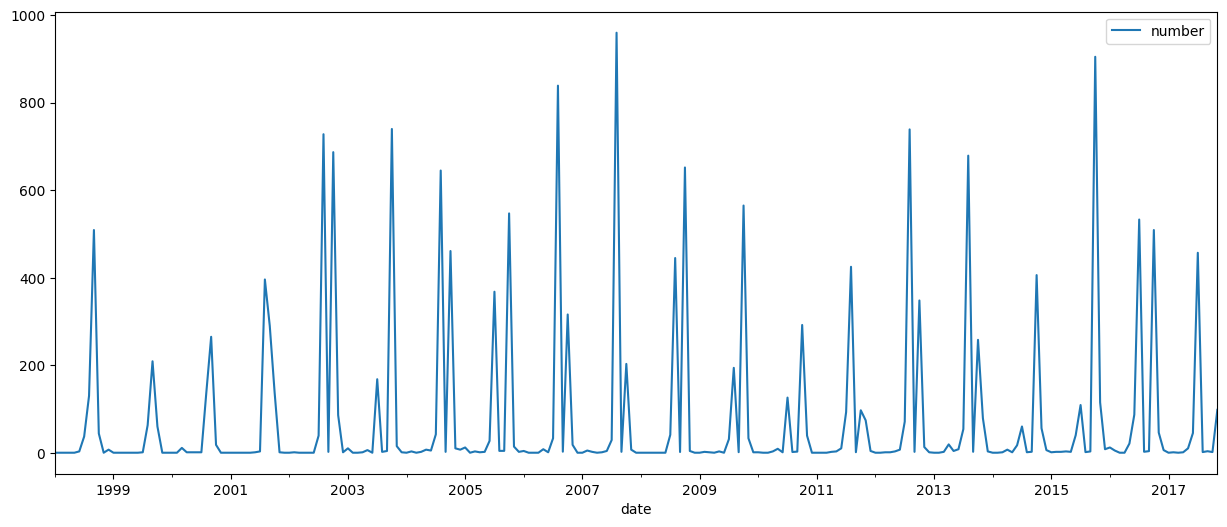

In [195]:
series_fires.plot()

In [196]:
train_fires, test_fires = series_fires.loc['1998':'2013'], series_fires.loc['2014':]

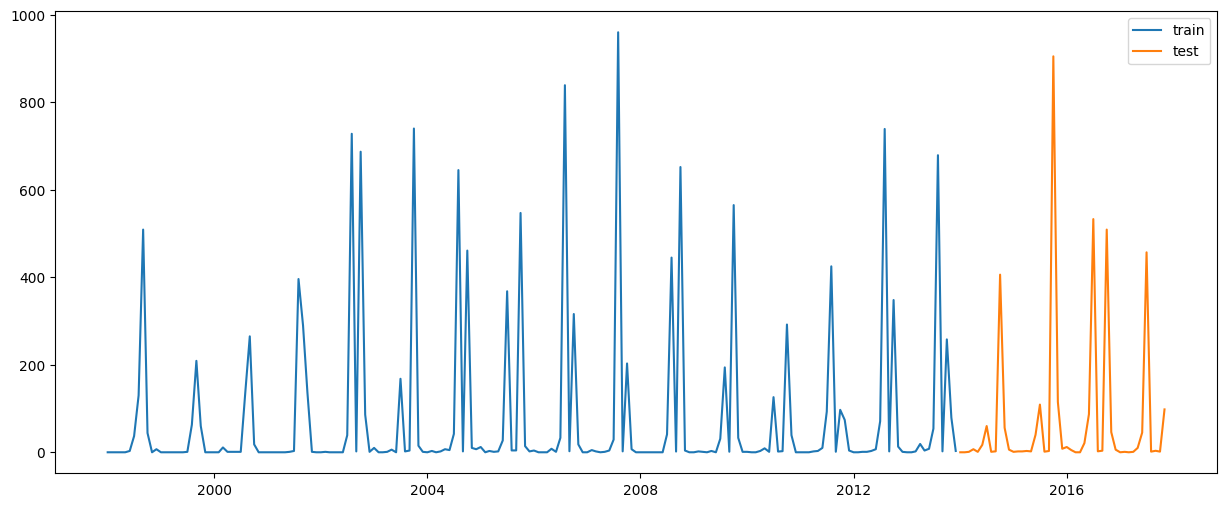

In [197]:
plt.plot(train_fires, label = 'train')
plt.plot(test_fires, label = 'test')
plt.legend(loc = 'best')
plt.show()

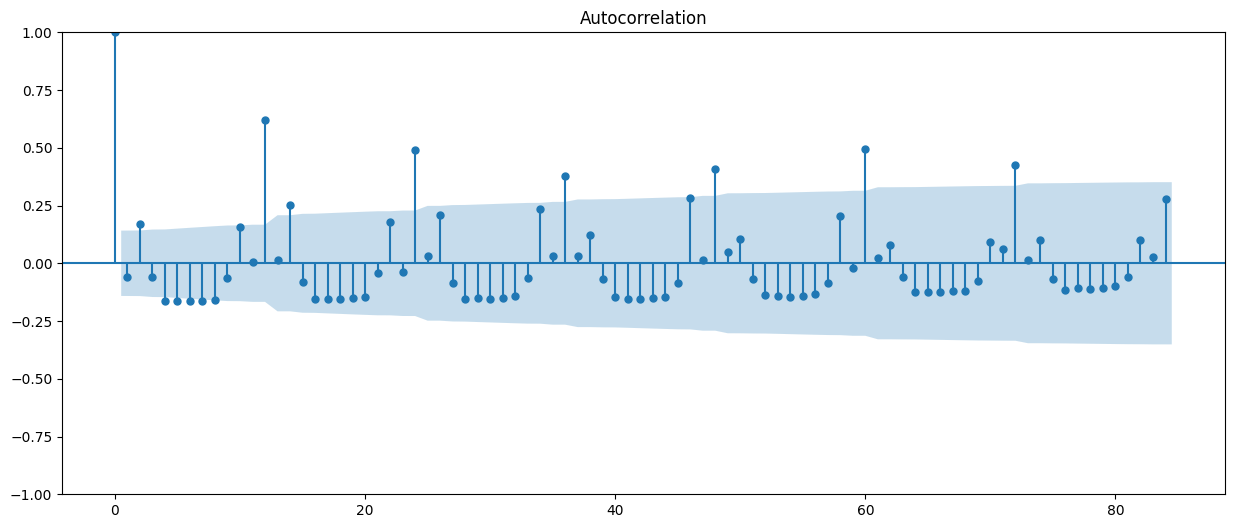

In [198]:
sm.graphics.tsa.plot_acf(train_fires, lags=84)
plt.show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


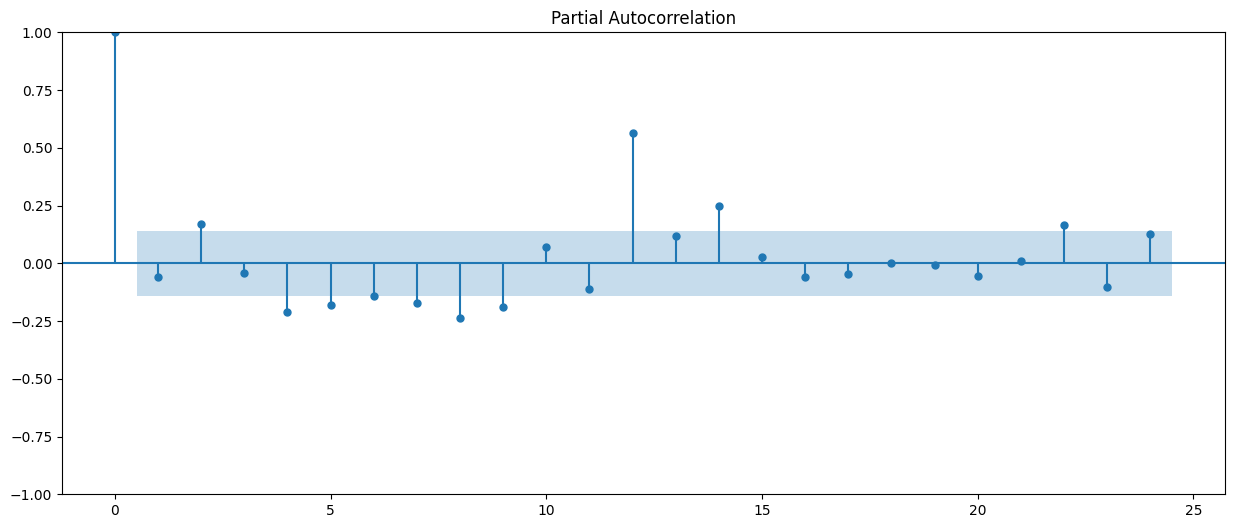

In [199]:
fig = sm.graphics.tsa.plot_pacf(train_fires, lags=24)
plt.show()

In [200]:
adfuller(train_fires)[1]

0.24390540296483593

In [201]:
# se a hipótese nula (a série é não estacionária) for rejeitada então 29% dos casos vão estar incorretos

In [202]:
adfuller(train_fires.diff(1).dropna())[1]

1.251980769150076e-20

<Axes: xlabel='date'>

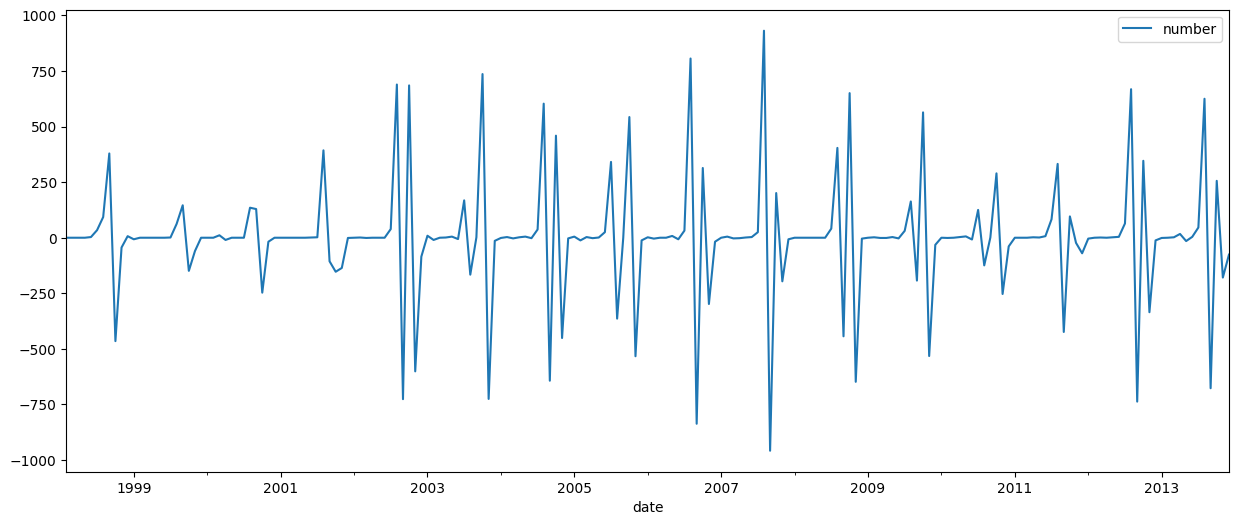

In [203]:
train_fires.diff(1).dropna().plot()

In [204]:
# apenas uma diferenciação é necessária para preparação dos dados
d_fires = 1

In [205]:
# seleção de hiperparâmetros
# SARIMAX(train, order = (p_fires, d_fires, q_fires), seasonal_order = (P_fires, D_fires, Q_fires, m_fires))

d_fires = d_fires
p_fires = 0 # lags em sequência do gráfico de autocorrelação parcial que estão correlacionados
q_fires = 0 # gráfico de autocorrelação

P_fires = [1,2,3,4,5] # 1 mas é bom testar outros
D_fires = 0
Q_fires = [1,2,3,4,5,6]
m_fires = 12

In [206]:
best_mse = np.inf

for p in P_fires:
    for q in Q_fires:
        try:

            model = SARIMAX(train_fires, order = (p_fires, d_fires, q_fires), seasonal_order=(p, D_fires, q, 12)).fit()
            train_prev = model.predict()
            test_prev = model.forecast(len(test_fires))
        
        except:
            
            print(f"erro")
            continue

        # mape = MAPE(test_fires.number, test_prev)
        mse = MSE(test_fires.number, test_prev)
        if mse < best_mse:
            best_mse = mse
            best_P = p
            best_Q = q


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python

erro


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to 

In [207]:
(best_P, best_Q, best_mse)

(4, 4, 25092.159928436842)

In [159]:
model = SARIMAX(train_fires, order = (p_fires, d_fires, q_fires), seasonal_order=(best_P, D_fires, best_Q, 12)).fit()
train_prev = model.predict()
test_prev = model.forecast(len(test_fires))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [160]:
# model = SARIMAX(train_fires, order = (p_fires, d_fires, q_fires), seasonal_order=(1, 0, 6, 12)).fit()
# train_prev = model.predict()
# test_prev = model.forecast(len(test_fires))

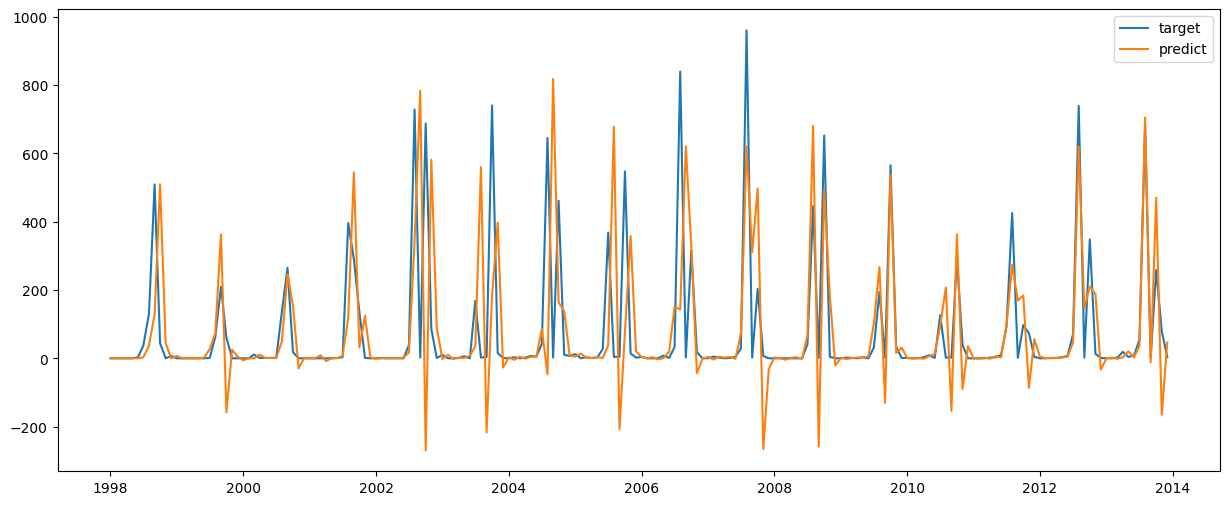

In [161]:
plt.plot(train_fires, label = 'target')
plt.plot(train_prev, label = 'predict')
plt.legend()
plt.show()

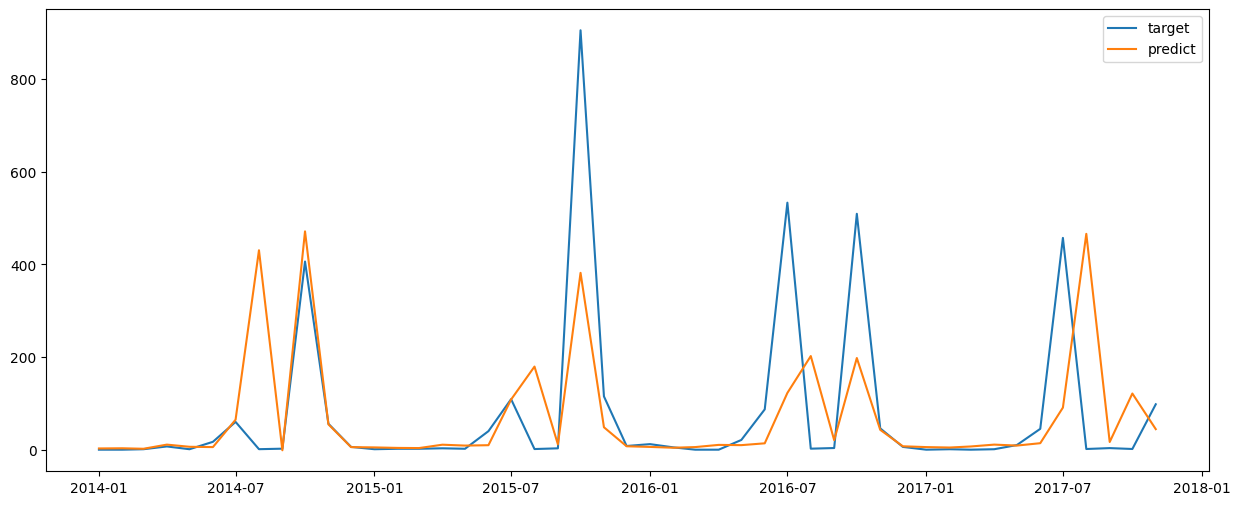

In [162]:
plt.plot(test_fires, label = 'target')
plt.plot(test_prev, label = 'predict')
plt.legend()
plt.show()

In [163]:
MSE(test_fires.number, test_prev)

25092.159928436842

## Matlab Series

In [164]:
series_matlab

,month,matlab
0,2009-01-31,19
1,2009-02-28,27
2,2009-03-31,24
3,2009-04-30,32
4,2009-05-31,42
...,...,...
127,2019-08-31,371
128,2019-09-30,362
129,2019-10-31,523
130,2019-11-30,479


In [165]:
series_matlab['month'] = pd.to_datetime(series_matlab['month'])

In [166]:
series_matlab = series_matlab.set_index('month')

In [167]:
series_matlab

,matlab
month,
2009-01-31,19
2009-02-28,27
2009-03-31,24
2009-04-30,32
2009-05-31,42
...,...
2019-08-31,371
2019-09-30,362
2019-10-31,523


<Axes: xlabel='month'>

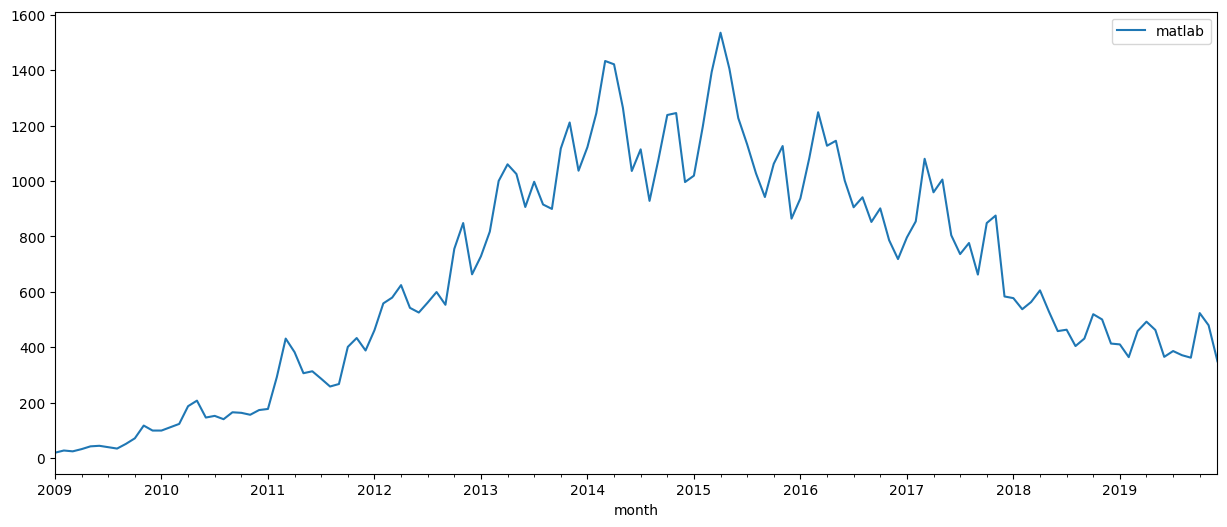

In [168]:
series_matlab.plot()

In [169]:
train_matlab, test_matlab = series_matlab.loc['2009':'2016'], series_matlab.loc['2017':]

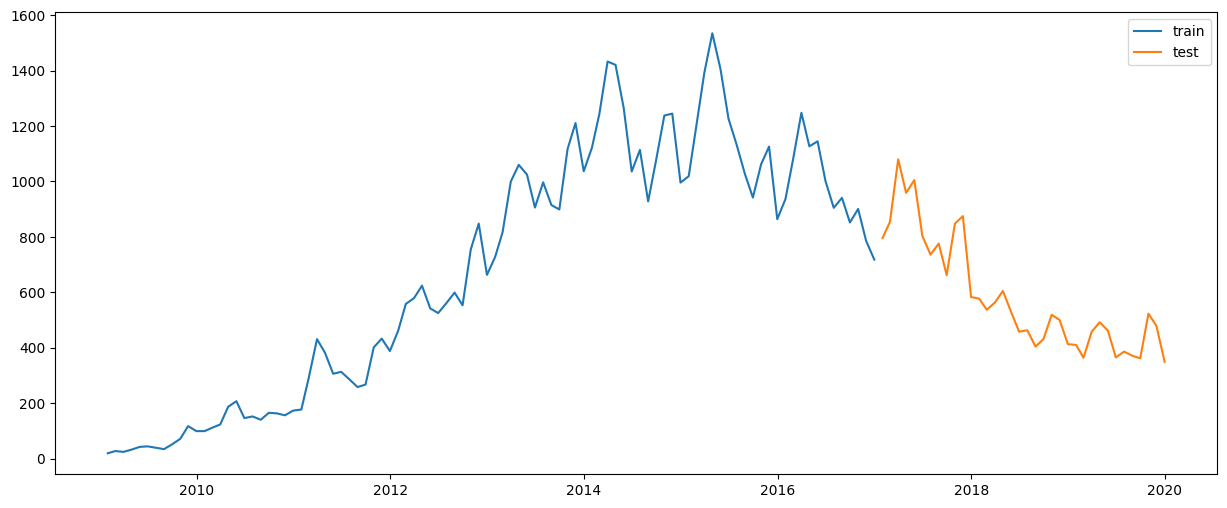

In [170]:
plt.plot(train_matlab, label = 'train')
plt.plot(test_matlab, label = 'test')
plt.legend(loc = 'best')
plt.show()

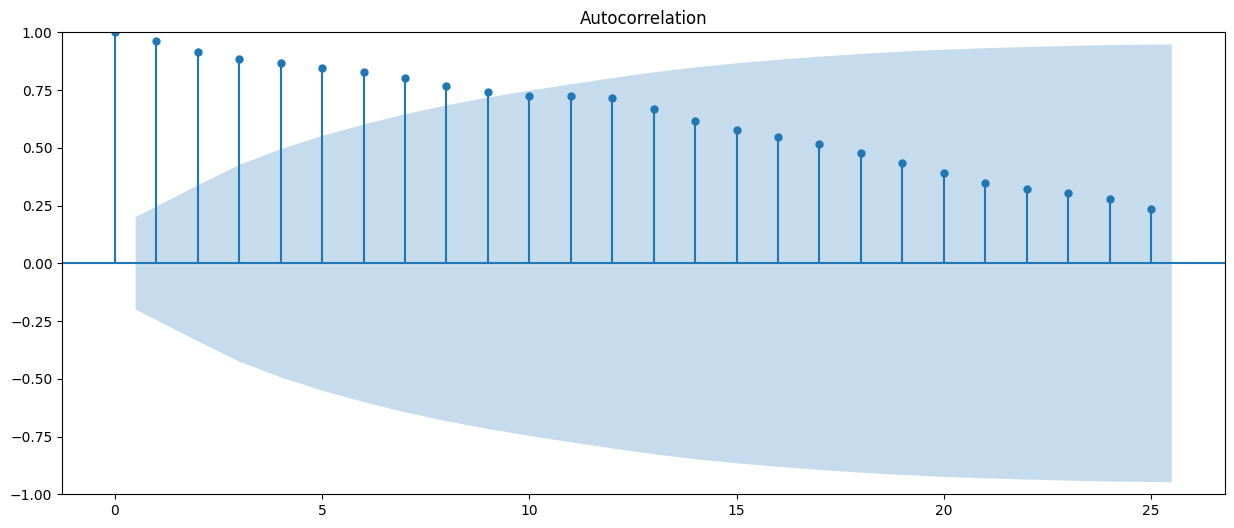

In [171]:
sm.graphics.tsa.plot_acf(train_matlab, lags=25)
plt.show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


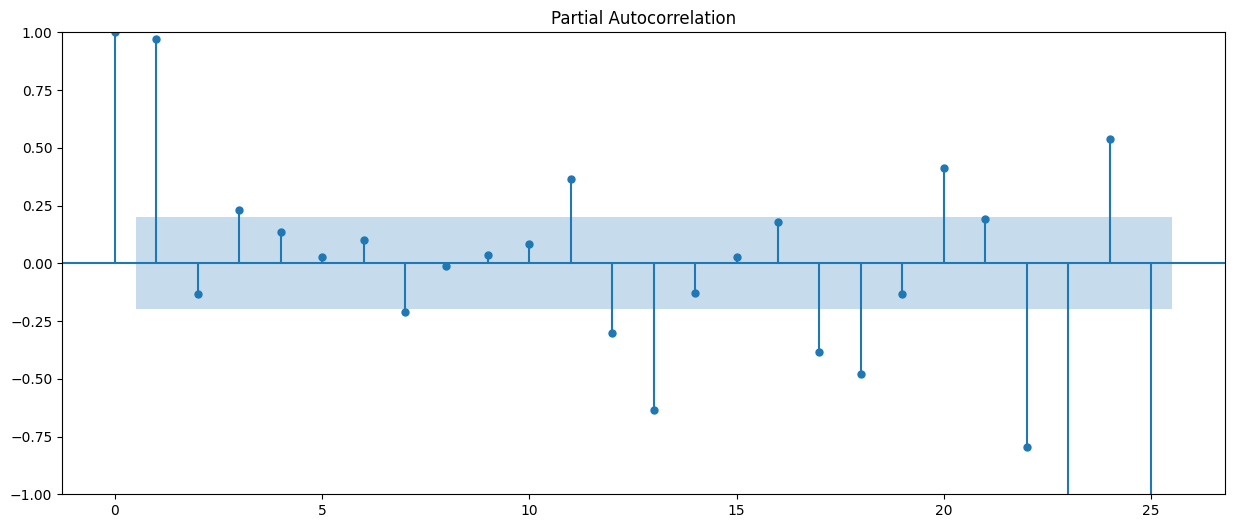

In [172]:
fig = sm.graphics.tsa.plot_pacf(train_matlab, lags=25)
plt.show()

In [173]:
adfuller(train_matlab)[1]

0.4323589568531159

In [174]:
# se a hipótese nula (a série é não estacionária) for rejeitada então 43% dos casos vão estar incorretos

In [175]:
adfuller(train_matlab.diff(1).dropna())[1]

0.593995719956846

In [176]:
adfuller(train_matlab.diff(1).diff(1).dropna())[1]

1.906778928336267e-16

<Axes: xlabel='month'>

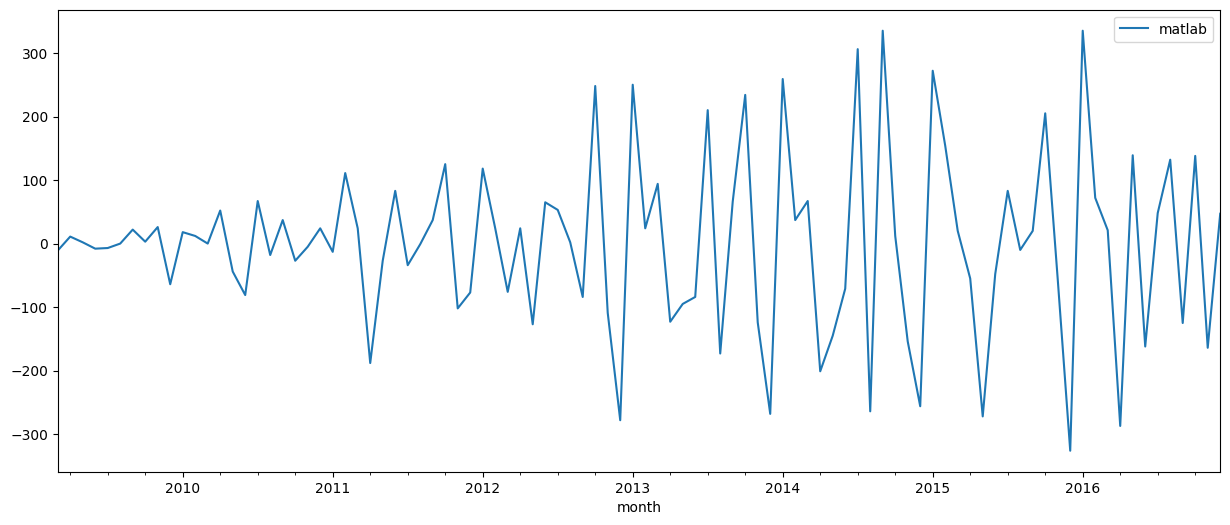

In [177]:
train_matlab.diff(1).diff(1).dropna().plot()

In [178]:
# duas diferenciações são necessárias para preparação dos dados
d_matlab = 2

In [179]:
# seleção de hiperparâmetros
# SARIMAX(train, order = (p_matlab, d_matlab, q_matlab), seasonal_order = (P_matlab, D_matlab, Q_matlab, m_matlab))

d_matlab = d_matlab
p_matlab = [0,1,2,3,4,5] # lags em sequência do gráfico de autocorrelação parcial que estão correlacionados (1 mas é bom testar mais)
q_matlab = [0,1,2,3,4,5,6,7,8,9] # gráfico de autocorrelação (9)

P_matlab = [] # sem sazonalidade
D_matlab = [] # sem sazonalidade
Q_matlab = [] # sem sazonalidade
m_matlab = [] # sem sazonalidade

In [180]:
best_mse = np.inf

for p in p_matlab:
    for q in q_matlab:
        try:

            model = SARIMAX(train_matlab, order = (p, d_matlab, q)).fit()
            train_prev = model.predict()
            test_prev = model.forecast(len(test_matlab))
        
        except:
            
            print(f"erro")
            continue

        mse = MSE(test_matlab.matlab, test_prev)
        if mse < best_mse:
            best_mse = mse
            best_p = p
            best_q = q


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python

In [181]:
(best_p, best_q, best_mse)

(2, 9, 12908.775169785324)

In [182]:
model = SARIMAX(train_matlab, order = (best_p, d_matlab, best_q)).fit()
train_prev = model.predict()
test_prev = model.forecast(len(test_matlab))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [183]:
# model = SARIMAX(train_matlab, order = (1, d_matlab, 1)).fit()
# model = SARIMAX(train_matlab, order = (1, d_matlab, 1), seasonal_order=(2, 0, 2, 12)).fit()

In [184]:
train_prev = model.predict()
test_prev = model.forecast(len(test_matlab))

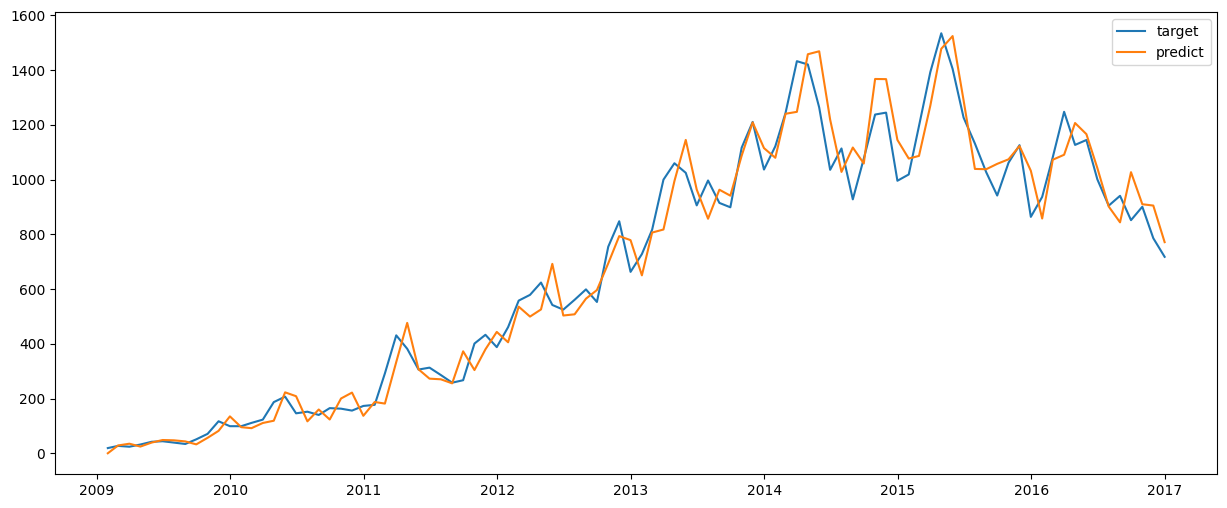

In [185]:
plt.plot(train_matlab, label = 'target')
plt.plot(train_prev, label = 'predict')
plt.legend()
plt.show()

In [186]:
# MAPE(train_matlab.matlab, train_prev)

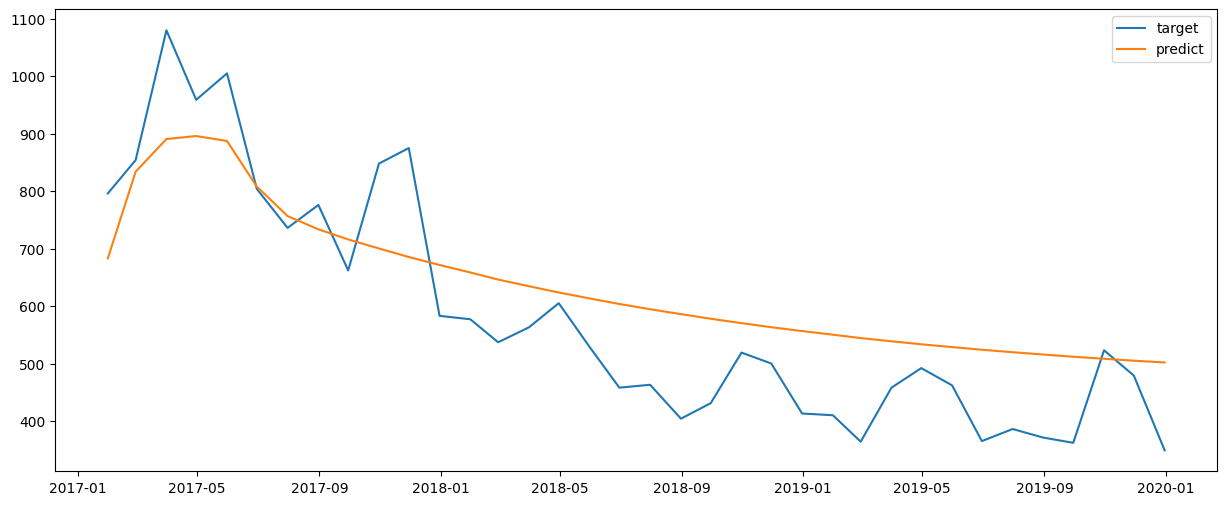

In [187]:
plt.plot(test_matlab, label = 'target')
plt.plot(test_prev, label = 'predict')
plt.legend()
plt.show()

In [188]:
MSE(test_matlab.matlab, test_prev)

12908.775169785324